# National Parks Service Biodiversity
Codecademy Portfolio Project by Leah Fulmer ([Github](https://github.com/leahmfulmer))<br>

#### Project Objectives from Codecademy:

* Complete a project to add to your portfolio
* Use Jupyter Notebook to communicate findings
* Run an analysis on a set of data
* Become familiar with data analysis workflow

#### Table of Contents : COMPLETE IN POST
[Section 1: Loading and Examining the Data](#data)<br>
[Section 2: Wrangling and Tidying the Data](#tidy)<br>
[Section 3: Questions for Analysis](#questions)<br>
[Section 4: Analysis of Observations](#observations)<br>
[Section 5: Analysis of Conservation Status](#conservation)<br>
[Section 6: Analysis of National Parks](#parks)<br>
[Section 7: Resting Place](#rest)<br>

### Section 1: Loading and Examining the Data <a id="data"></a>

In [1]:
# Import modules

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load data

observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

In [3]:
# Examine observations

print("The dataset 'observations' contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

observations.head()
# observations.count()

The dataset 'observations' contains 23296 rows and 3 columns.


,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
# Examine species_info

print("The dataset 'species_info' contains {} rows and \
{} columns.".format(species_info.shape[0], species_info.shape[1]))

species_info.head()
# species_info.count()

The dataset 'species_info' contains 5824 rows and 4 columns.


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Section 2: Wrangling and Tidying the Data<a id="tidy"></a>

#### All Datasets

In [5]:
# Make all rows with strings lower case

def make_lower_case(df):
    for column in df.columns:
        if type(df[column][0]) != np.int64:
            df[column] = df[column].apply(lambda x: x.lower() if type(x) != float else x)

make_lower_case(observations)
make_lower_case(species_info)

#### Observations

In [6]:
# Drop completely-duplicated rows

observations.drop_duplicates(subset=['scientific_name', 'park_name', 'observations'], inplace=True)
print("The dataset 'observations' now contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

The dataset 'observations' now contains 23281 rows and 3 columns.


In [7]:
# Sum observational instances for rows with duplicated scientific_name and park_name 

observations = observations.groupby(['scientific_name', 'park_name'])['observations'].sum().reset_index()
print("The dataset 'observations' now contains {} rows and \
{} columns.".format(observations.shape[0], observations.shape[1]))

The dataset 'observations' now contains 22164 rows and 3 columns.


#### Species_info

In [8]:
# Count how many rows we expect in our tidy species_info dataset

duplicates = species_info[species_info.duplicated(subset=['scientific_name'])]
print("There are {} rows with the same scientific_name in 'species_info'."\
      .format(duplicates.shape[0]))
print("Therefore, we expect our tidy 'species_info' dataset to contain {} rows."\
      .format(species_info.shape[0] - duplicates.shape[0]))

There are 283 rows with the same scientific_name in 'species_info'.
Therefore, we expect our tidy 'species_info' dataset to contain 5541 rows.


In [9]:
# Replace NaN values with "no data"

species_info.conservation_status = species_info.conservation_status.fillna("no data")

In [10]:
# Join common_names and conservation_status for duplicated scientific_name

species_info = species_info.groupby('scientific_name', as_index=False)\
.agg({'common_names': lambda x: ', '.join(x), 'category': 'first', \
      'conservation_status': 'last'})

print("The dataset 'species_info' now contains {} rows and \
{} columns.".format(species_info.shape[0], species_info.shape[1]))
species_info.head()

The dataset 'species_info' now contains 5541 rows and 4 columns.


,scientific_name,common_names,category,conservation_status
0,abies bifolia,rocky mountain alpine fir,vascular plant,no data
1,abies concolor,"balsam fir, colorado fir, concolor fir, silver...",vascular plant,no data
2,abies fraseri,fraser fir,vascular plant,species of concern
3,abietinella abietina,abietinella moss,nonvascular plant,no data
4,abronia ammophila,"wyoming sand verbena, yellowstone sand verbena",vascular plant,species of concern


#### Merge

In [11]:
# Combine 'observations' and 'species_info'

combined = pd.merge(observations, species_info, on = ['scientific_name'], how = 'left')

print("The dataset 'combined' contains {} rows and \
{} columns.".format(combined.shape[0], combined.shape[1]))
combined.head()

The dataset 'combined' contains 22164 rows and 6 columns.


,scientific_name,park_name,observations,common_names,category,conservation_status
0,abies bifolia,bryce national park,109,rocky mountain alpine fir,vascular plant,no data
1,abies bifolia,great smoky mountains national park,72,rocky mountain alpine fir,vascular plant,no data
2,abies bifolia,yellowstone national park,215,rocky mountain alpine fir,vascular plant,no data
3,abies bifolia,yosemite national park,136,rocky mountain alpine fir,vascular plant,no data
4,abies concolor,bryce national park,83,"balsam fir, colorado fir, concolor fir, silver...",vascular plant,no data


#### Separate by National Park

In [12]:
# Create unique dataframes for each National Park

def isolate(park_name):
    df = combined[combined.park_name == park_name]
    return df

bryce = isolate("bryce national park")
great_smoky = isolate("great smoky mountains national park")
yellowstone = isolate("yellowstone national park")
yosemite = isolate("yosemite national park")

### Section 3: Questions for Analysis<a id="questions"></a>

* Which National Parks make the most observations? Which categories of species do they observe?


* Which categories of species are most flagged for conservation?
* What are the top ten most-observed species?

**Observations by Location:**
* Which national park takes the most observations and what do they observe?
* Which national park contains the most species flagged for conservation?
* Which categories or species are observed most?
* Do number of observations correlate with any other property (e.g., category, conservation_status)?

**Conservation Status:**
* What types of conservation status exist?
* Which categories are most flagged for conservation?

**National Parks:**
* Does the number of observations vary across national park?
* Which national park contains the most species flagged for conservation?

#### Which National Parks make the most observations? Which categories of species do they observe?

In [13]:
# Group observations by National Park
parks_grouped = combined.groupby(["park_name", "category"]).observations.sum().reset_index()

# Pivot by species category
pivot_category = parks_grouped.pivot(columns='category', \
                              index='park_name', values='observations').reset_index()
column_order = ['park_name', 'vascular plant', 'bird', 'nonvascular plant', 'mammal', 'fish', 'reptile', 'amphibian']
row_order = ['yellowstone national park', 'yosemite national park', 'bryce national park', 'great smoky mountains national park']
pivot_category = pivot_category.reindex(column_order, axis=1).reindex([2,3,0,1])

# Create a color dictionary
palette = sns.color_palette("gist_earth", 8)
# palette.reverse()
colors = dict(zip(column_order, palette))

# parks_grouped.head()
# pivot_category.head()

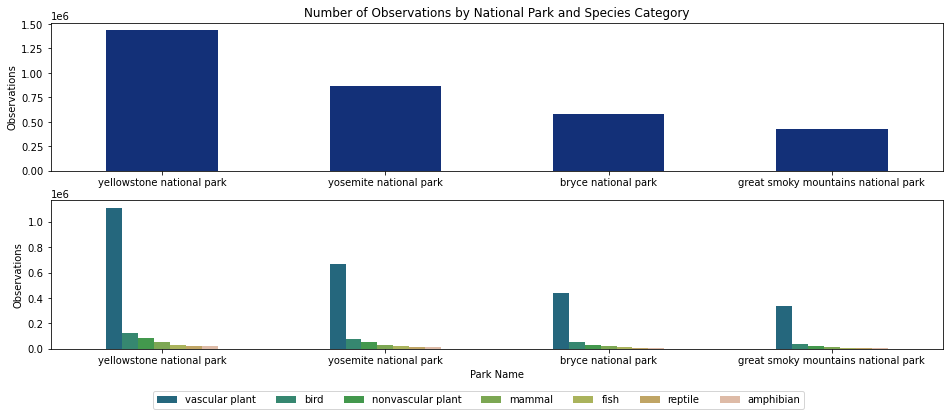

In [14]:
# Plot Number of Observations by National Park and Species Category

fig, axes = plt.subplots(figsize=(16,6), nrows=2, ncols=1)

# Observations sum
df = parks_grouped.groupby('park_name').observations.sum().reset_index()\
        .sort_values('observations', ascending=False)
ax = df.plot(ax=axes[0], \
        kind='bar', rot=0, title="Number of Observations by National Park and Species Category", \
        xlabel='', ylabel="Observations", legend=False, color=colors['park_name'])
ax.set_xticklabels(df.park_name)

# Observations by category
pivot_category.plot(ax=axes[1], x='park_name', kind='bar', \
                    rot=0, xlabel="Park Name", ylabel="Observations", color=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.85, -0.25))

plt.show()

Yellowstone National Park makes the most observations. Among every park, vascular plants are by far the most observed category, making other categories difficult to see. Let's drop vascular plants from our dataset and take a closer look at the distribution of observations in the other categories.

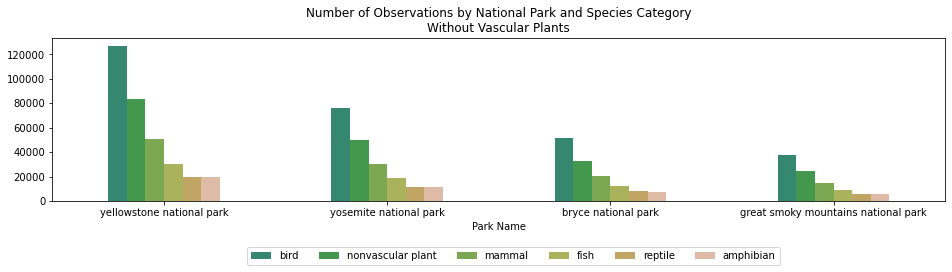

In [15]:
# Plot Number of Observations by National Park and Species Category Without Vascular Plants

pivot_category.drop(['vascular plant'], axis=1).plot(x='park_name', kind='bar', rot=0, \
        title="Number of Observations by National Park and Species Category\nWithout Vascular Plants", \
        xlabel='Park Name', figsize=(16,3), color=colors)
plt.legend(ncol=7, bbox_to_anchor=(0.82, -0.25))

plt.show()

The distribution of observations among every park takes a surprisingly similar shape. Birds are most observed, followed by nonvascular plants, then mammals, fish, and ending with amphibians and reptiles nearly tied for least number of observations. This pattern may illuminate how the data was taken. Finding the pattern a little too neat (and remembering that Codecademy does not cite a data source), my first impression was that the data is simulated. However, although the proportions of observations look similar in the above visualization, their exact values are all slightly off from exactly proportionate. Perhaps this pattern instead speaks to the observational accessibility of varying categories or an observational quota required by the investigators.

#### What is the categorical distribution among species flagged for conservation?

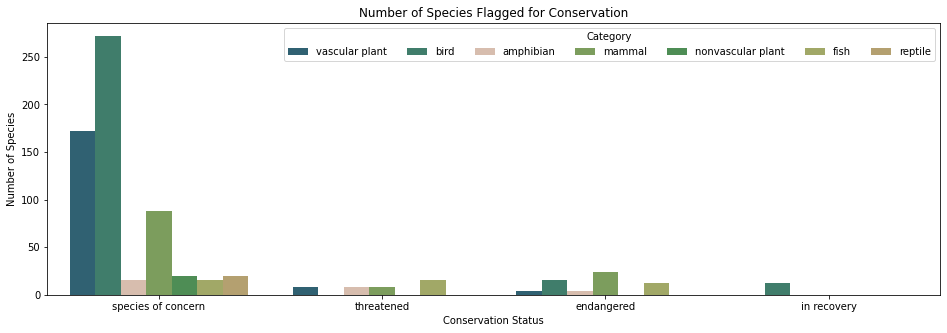

In [16]:
# Isolate species flagged for conservation
conserve = combined[combined.conservation_status != 'no data']

plt.figure(figsize=(16,5))
sns.countplot(data=conserve, x='conservation_status', hue='category', palette=colors)
plt.legend(ncol=7, bbox_to_anchor=(1,1), title='Category')
plt.title("Number of Species Flagged for Conservation")
plt.xlabel("Conservation Status")
plt.ylabel("Number of Species")
plt.show()

The large majority of those species flagged for conservation are classified as "species of concern", rather than "threated", "endangered", or "in recovery". 

### Section 7: Resting Place<a id="rest"></a>

In [17]:
# Isolate species flagged for conservation in each park

def conserve(df):
    df = df[df.conservation_status != 'no data']
    return df

bryce_conserve = conserve(bryce)
great_smoky_conserve = conserve(great_smoky)
yellowstone_conserve = conserve(yellowstone)
yosemite_conserve = conserve(yosemite)

yosemite_conserve[yosemite_conserve.conservation_status == 'in recovery'].head(10)

,scientific_name,park_name,observations,common_names,category,conservation_status
8455,falco peregrinus anatum,yosemite national park,152,american peregrine falcon,bird,in recovery
9387,haliaeetus leucocephalus,yosemite national park,112,bald eagle,bird,in recovery
14379,pelecanus occidentalis,yosemite national park,122,brown pelican,bird,in recovery


In [18]:
yellowstone_conserve[yellowstone_conserve.conservation_status == 'in recovery'].head(10)

,scientific_name,park_name,observations,common_names,category,conservation_status
8454,falco peregrinus anatum,yellowstone national park,176,american peregrine falcon,bird,in recovery
9386,haliaeetus leucocephalus,yellowstone national park,187,bald eagle,bird,in recovery
14378,pelecanus occidentalis,yellowstone national park,196,brown pelican,bird,in recovery


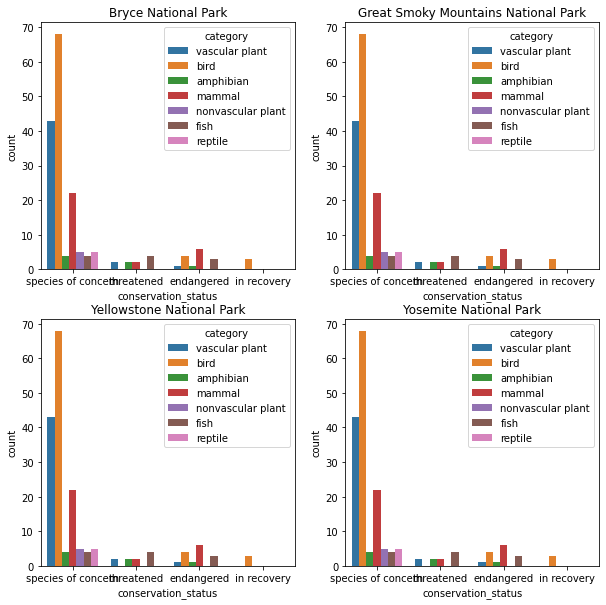

In [19]:
# Plot conservation_status stacked by category for multiple parks

fig, axes = plt.subplots(figsize=(10,10), nrows=2, ncols=2)

a = sns.countplot(ax=axes[0,0], data=bryce_conserve, x='conservation_status', hue='category')
a.set_title("Bryce National Park")

b = sns.countplot(ax=axes[0,1], data=great_smoky_conserve, x='conservation_status', hue='category')
b.set_title("Great Smoky Mountains National Park")

c = sns.countplot(ax=axes[1,0], data=yellowstone_conserve, x='conservation_status', hue='category')
c.set_title("Yellowstone National Park")

d = sns.countplot(ax=axes[1,1], data=yosemite_conserve, x='conservation_status', hue='category')
d.set_title("Yosemite National Park")

plt.show()



# sns.move_legend(g, "upper right", title='Category')
# plt.title("Bryce National Park")
# plt.show()

# parks_grouped.groupby('park_name').observations.sum().plot(ax=axes[0], \
#         kind='bar', rot=0, title="Number of Observations by National Park and Species Category", \
#         xlabel='')
# pivot_category.plot(ax=axes[1], x='park_name', kind='bar', rot=0, xlabel="Park Name")
# plt.legend(ncol=7, bbox_to_anchor=(0.85, -0.25))

In [20]:
plt.figure(figsize=(20,10))
ax = sns.displot(data=conserve, x='conservation_status', \
                 hue='category', multiple='stack', height=5, aspect=1.8)
# sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.title("Conservation Status by Species Category")
plt.xlabel("Conservation Status")
plt.show()

ValueError: Could not interpret value `conservation_status` for parameter `x`

<Figure size 1440x720 with 0 Axes>

In [ ]:
# Group observations by National Park and pivot by park name, species category

parks_grouped = conserve.groupby('park_name', as_index=False)\
.agg({'observations': 'sum', 'common_'})

parks_grouped = conserve.groupby(["park_name", "category", "observations"]).observations.sum().reset_index()
pivot_park = parks_grouped.pivot(columns='park_name', \
                              index='category', values='observations').reset_index()
pivot_category = parks_grouped.pivot(columns='category', \
                              index='park_name', values='observations').reset_index()

parks_grouped.head()
# pivot_park.head()
# pivot_category.head()


# Join common_names and conservation_status for duplicated scientific_name

species_info = species_info.groupby('scientific_name', as_index=False)\
.agg({'common_names': lambda x: ', '.join(x), 'category': 'first', \
      'conservation_status': 'last'})
#       'conservation_status': lambda x: ', '.join(x)})

print("The dataset 'species_info' now contains {} rows and \
{} columns.".format(species_info.shape[0], species_info.shape[1]))
species_info.head()

In [ ]:
# Which national parks take the most observations and what do they observe?
# Pivot dataframe

pivoted_park = parks_grouped.pivot(columns='park_name', \
                              index='category', values='observations').reset_index()
pivoted_park.head()

pivoted_category = parks_grouped.pivot(columns='category', \
                              index='park_name', values='observations').reset_index()
pivoted_category.head()

In [ ]:
# Which national parks take the most observations and what do they observe?
# Plot

pivoted_category.plot(x='park_name', kind='bar', rot=0, figsize=(16,6))
plt.show()

In [ ]:
# Which national parks take the most observations and what do they observe?
# Remove vascular plants

pivoted_category = pivoted_category.drop('vascular plant', axis=1)
pivoted_category.head()

In [ ]:
# Which national parks take the most observations and what do they observe?
# Plot without vascular plants

pivoted_category.plot(x='park_name', kind='bar', rot=0, figsize=(16,6))
plt.show()

In [ ]:
plt.figure(figsize=(13,6))
# plt.bar(parks_grouped.park_name, parks_grouped.observations, color='maroon', edgecolor='k')
# sns.countplot(data=parks_grouped, x='park_name', hue='category')
ax = sns.displot(data=parks_grouped, x='park_name', \
                 hue='category', multiple='stack', height=5, aspect=1.8)
plt.xlabel("National Park")
plt.ylabel("Number of Observations")
plt.show()


plt.figure(figsize=(20,10))
ax = sns.displot(data=conserve, x='conservation_status', \
                 hue='category', multiple='stack', height=5, aspect=1.8)
# sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.title("Conservation Status by Species Category")
plt.xlabel("Conservation Status")
plt.show()

### Section 4: Analysis of Observations<a id="observations"></a>

### Section 5: Analysis of Conservation Status<a id="conservation"></a>

In [ ]:
# What types of conservation status exist?

combined.conservation_status.unique()

In [ ]:
# Which categories and species are most flagged for conservation?
# Isolate species with conservation status

conserve = combined[combined.conservation_status != "no data"]
conserve.head(50)

In [ ]:
# Which categories and species are most flagged for conservation?
# Plot species by conservation type

plt.figure(figsize=(20,10))
ax = sns.displot(data=conserve, x='conservation_status', \
                 hue='category', multiple='stack', height=5, aspect=1.8)
# sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
plt.title("Conservation Status by Species Category")
plt.xlabel("Conservation Status")
plt.show()


# conserve.plot(kind='bar', stacked='True')
# sns.countplot(data=conserve, x='conservation_status')

# Attempt 1: sns.countplot(data=conserve, x='conservation_status')
# Attempt 2: df_plot.plot(kind='bar', stacked=True)
# Attempt 3: sns.displot(df, x='survived', hue='class', multiple='stack')

In [ ]:
pivot_park = parks_grouped.pivot(columns='park_name', \
     index='category', values='observations').reset_index()
pivot_park.head()